#Thông tin sinh viên
- Họ tên: Nguyễn Thị Như Vân
- MSSV: 20520855
- Bài tập 3: 21/11/2022

# Kết nối với Google Drive

In [179]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [180]:
import os
dir_monhoc = '/content/drive/MyDrive/CS331.N12.KHCL'
dir_baitap = os.path.join(dir_monhoc, 'Baitap/Baitap3')
dir_database = os.path.join(dir_baitap, 'CIR/database')
dir_query = os.path.join(dir_baitap, 'CIR/query')

# Yêu cầu 1
- Sử dụng đặc trưng Histogram để mô tả các ảnh.
- Sử dụng phương pháp tính khoảng cách cosin giữa ảnh truy vấn và tập ảnh trong database
- Tính Precision@10 và Recall@10 cho 15 ảnh truy vấn.




## Functions

### Calculate histogram

In [181]:
def calculateHist(img):
  hist =  cv2.calcHist([img],[0],None,[256], [0,256])
  size = img.shape[0]*img.shape[1]
  hist = hist/size
  return hist

### Caculate distance

In [182]:
from scipy.spatial import distance

In [183]:
from scipy.spatial import distance

def cosineDist(img, imgs):
  cosine = []
  hist_source = calculateHist(img)
  for i in imgs:
    hist_data = calculateHist(i[1])
    cosine.append([1 - distance.cosine(hist_source, hist_data), i[0]])
  cosine.sort(reverse=True)
  
  return cosine

### Precision

In [184]:
def precisionAt_k(cosineDist, k):
  if k == 0:
    return None

  img_nameQuery = cosineDist[0].split('.')[0].split('_')[0]
  TP_At_k, FP_At_k = 0, 0
  for cosineImg in range(k):
    imgName = cosineDist[1][cosineImg][1].split('.')[0].split('_')[0]
    if img_nameQuery == imgName:
      TP_At_k += 1
    else:
      FP_At_k += 1

  return TP_At_k / (TP_At_k + FP_At_k)

### Recall

In [185]:
def recallAt_k(cosineDist, k):
  if k == 0:
    return None

  img_nameQuery = cosineDist[0].split('.')[0].split('_')[0]
  TP_At_k, FN_At_k = 0, 0
  for cosineImg in range(k):
    imgName = cosineDist[1][cosineImg][1].split('.')[0].split('_')[0]
    if img_nameQuery == imgName:
      TP_At_k += 1
  
  for cosineImg in range(k, len(cosineDist[1])):
    imgName = cosineDist[1][cosineImg][1].split('.')[0].split('_')[0]
    if img_nameQuery == imgName:
      FN_At_k += 1

  return TP_At_k / (TP_At_k + FN_At_k)

## Histogram and Cosine distance

In [186]:
img_names = os.listdir(dir_database)
img_names.sort()

In [187]:
import cv2

In [188]:
from google.colab.patches import cv2_imshow
imgs = []
for name in img_names:
  img_path = dir_database + '/' + name
  imgs.append([name, cv2.imread(img_path, 0)])

In [189]:
img_querynames = os.listdir(dir_query)
cosineDists = []

for img_name in img_querynames:
  img = cv2.imread(dir_query + '/' + img_name)
  cosineDists.append([img_name, cosineDist(img, imgs)])

In [190]:
cosineDists

[['accordion_02.jpg',
  [[0.974459402884709, 'accordion_08.jpg'],
   [0.9670032262802124, 'accordion_05.jpg'],
   [0.9659250626698663, 'barrel_09.jpg'],
   [0.9562052348163759, 'accordion_06.jpg'],
   [0.940085753631833, 'accordion_07.jpg'],
   [0.9304718912549207, 'barrel_07.jpg'],
   [0.9239475131034851, 'accordion_10.jpg'],
   [0.920956552028656, 'anchor_01.jpg'],
   [0.9175375342665074, 'anchor_06.jpg'],
   [0.9137243172353618, 'accordion_01.jpg'],
   [0.9070746227766089, 'accordion_03.jpg'],
   [0.9025387869529233, 'accordion_02.jpg'],
   [0.8939773313477014, 'accordion_04.jpg'],
   [0.8615560004710684, 'accordion_09.jpg'],
   [0.8555659651756287, 'ant_10.jpg'],
   [0.8442194866805969, 'ant_01.jpg'],
   [0.8341229925497977, 'ant_06.jpg'],
   [0.5918113847178311, 'barrel_04.jpg'],
   [0.5091386546667117, 'anchor_07.jpg'],
   [0.5048723326581999, 'ant_03.jpg'],
   [0.4052950729521356, 'barrel_10.jpg'],
   [0.3206709623336792, 'barrel_03.jpg'],
   [0.30398165308524483, 'barrel_01.jpg

## Tính Precision@10 và Recall@10 cho 15 ảnh truy vấn


In [191]:
PrecisionK, RecallK = [], []

for cosineDist in cosineDists:
  PrecisionK.append(precisionAt_k(cosineDist, 10))
  RecallK.append(recallAt_k(cosineDist, 10))

In [192]:
from tabulate import tabulate

mydata, queryNo = [], 1
for i, j, k in  zip(img_querynames, PrecisionK, RecallK):
  mydata.append([queryNo, i, j, k])
  queryNo += 1

head = ['Query No.', 'Image Name', 'Precision@10', 'Recall@10']

print(tabulate(mydata, headers=head, tablefmt="grid"))

+-------------+------------------+----------------+-------------+
|   Query No. | Image Name       |   Precision@10 |   Recall@10 |
+=============+==================+================+=============+
|           1 | accordion_02.jpg |            0.6 |         0.6 |
+-------------+------------------+----------------+-------------+
|           2 | accordion_03.jpg |            0.6 |         0.6 |
+-------------+------------------+----------------+-------------+
|           3 | accordion_01.jpg |            0.6 |         0.6 |
+-------------+------------------+----------------+-------------+
|           4 | airplane_02.jpg  |            0.5 |         0.5 |
+-------------+------------------+----------------+-------------+
|           5 | airplane_01.jpg  |            0.6 |         0.6 |
+-------------+------------------+----------------+-------------+
|           6 | airplane_03.jpg  |            0.5 |         0.5 |
+-------------+------------------+----------------+-------------+
|         

# Yêu cầu 2
- Minh họa 10 kết quả khi thực hiện truy vấn bằng ảnh “ant_02.jpg”

In [193]:
import matplotlib.pyplot as plt

In [194]:
import numpy as np

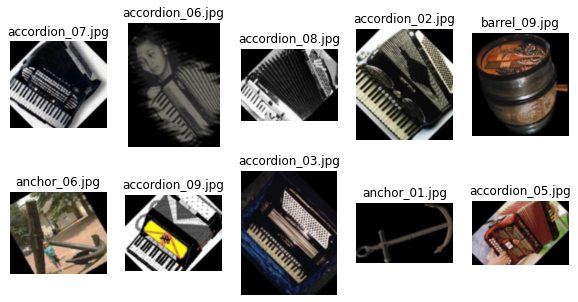

In [195]:
plt.figure(figsize=(10, 5))
for i in range(10):
  plt.subplot(2, 5, i + 1)
  plt.axis('off')
  plt.title(cosineDists[8][1][i][1])
  img = cv2.imread(dir_database + '/' + cosineDists[8][1][i][1], cv2.IMREAD_COLOR)
  img = cv2.cvtColor(img.astype(np.uint8), cv2.COLOR_BGR2RGB)
  plt.imshow(img, interpolation='bicubic')

# Yêu cầu 3
- Tính độ đo MAP@10
- Tính độ đo MRR cho 15 ảnh query


## MAP@10

In [196]:
print(f"MAP@10: {sum(PrecisionK) / len(RecallK)}")

MAP@10: 0.3333333333333333


## MRR cho 15 ảnh query

In [197]:
def MRR(cosineDists):
  reciprocalRank = []

  for retrieved in cosineDists:
    name_query = retrieved[0].split('.')[0].split('_')[0]
    reciprocalRank.append(0)
    index = 1
    for i in retrieved[1]:
      img_name = i[1].split('.')[0].split('_')[0]
      if img_name == name_query:
        reciprocalRank[len(reciprocalRank) - 1] = index
        break
      index += 1

  MRR = 0
  for i in reciprocalRank:
    if i != 0:
      MRR += 1/i

  return MRR/len(cosineDists)

In [198]:
len(cosineDists)

15

In [199]:
MRR(cosineDists)

0.6086507936507937